In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
avidata = pd.read_csv('AviationData.csv',low_memory=False,parse_dates=['Event.Date'], encoding='latin-1')

In [3]:
avidata = avidata[avidata['Country'] == 'United States']
avidata

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87275,20211221104429,Accident,WPR22LA066,2021-12-20,"Phoenix, AZ",United States,033483N,0112836W,NaN,NaN,...,Business,RAINBOW RYDERS INC,0.0,0.0,1.0,15.0,NaN,NaN,NaN,NaN
87277,20211223104439,Accident,GAA22WA054,2021-12-21,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,20211228104450,Accident,WPR22LA069,2021-12-22,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,20211227104443,Accident,CEN22FA082,2021-12-26,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Indexing with Time Series Data

In [5]:
avidata = avidata.set_index('Event.Date')
avidata.index

DatetimeIndex(['1948-10-24', '1962-07-19', '1974-08-30', '1977-06-19',
               '1979-08-02', '1979-09-17', '1981-08-01', '1982-01-01',
               '1982-01-01', '1982-01-01',
               ...
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-16',
               '2021-12-18', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-26', '2021-12-29'],
              dtype='datetime64[ns]', name='Event.Date', length=80998, freq=None)

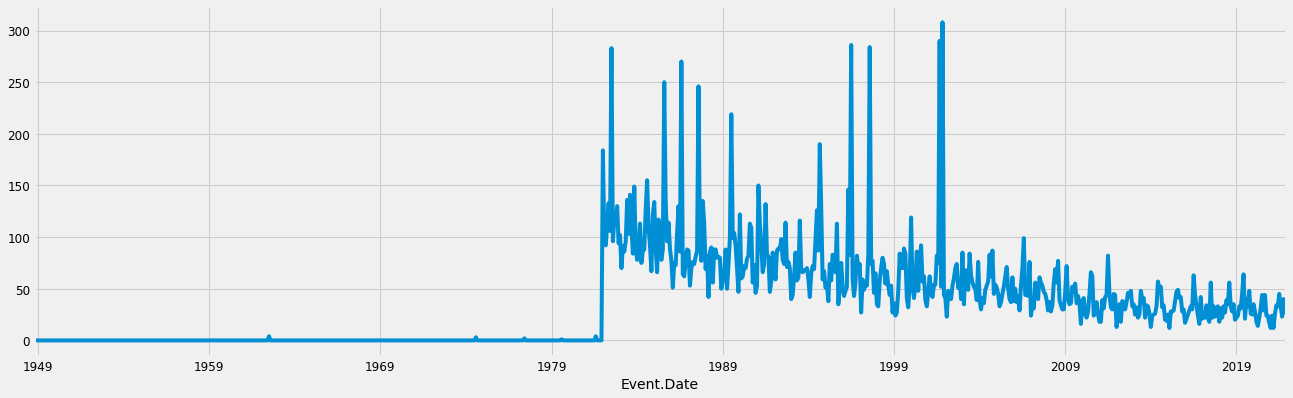

In [6]:
y = avidata['Total.Fatal.Injuries'].resample('M').sum()
y.plot(figsize=(20, 6))
plt.show()

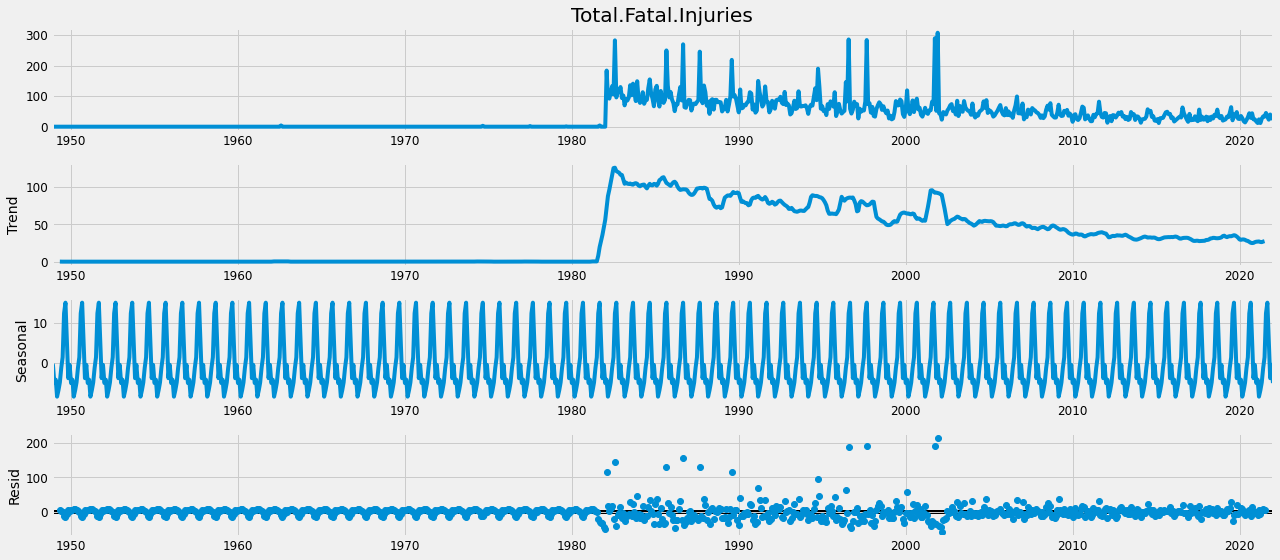

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# Time Series Forecasting with ARIMA

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param, seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9540.4442593926
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8980.741150967744
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8601.301422703673
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8267.99964148679
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8525.363580955098
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8362.870265970296
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8332.960523758944
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8269.975864080845
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9111.942083191405
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8762.410750568793
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8578.549495165993
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8222.780170411492
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8491.87976304136
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8316.944158997063
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8310.790674739645
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8224.627902067023
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8637.842149406155
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8525.267368540299
ARIMA(0, 1, 0)

# Fitting the ARIMA model

In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0217      0.023     -0.929      0.353      -0.068       0.024
ma.L1         -0.8179      0.010    -78.412      0.000      -0.838      -0.797
ar.S.L12       0.0036      0.022      0.165      0.869      -0.040       0.047
ma.S.L12      -0.9291      0.011    -86.368      0.000      -0.950      -0.908
sigma2       678.6420      9.058     74.921      0.000     660.888     696.396


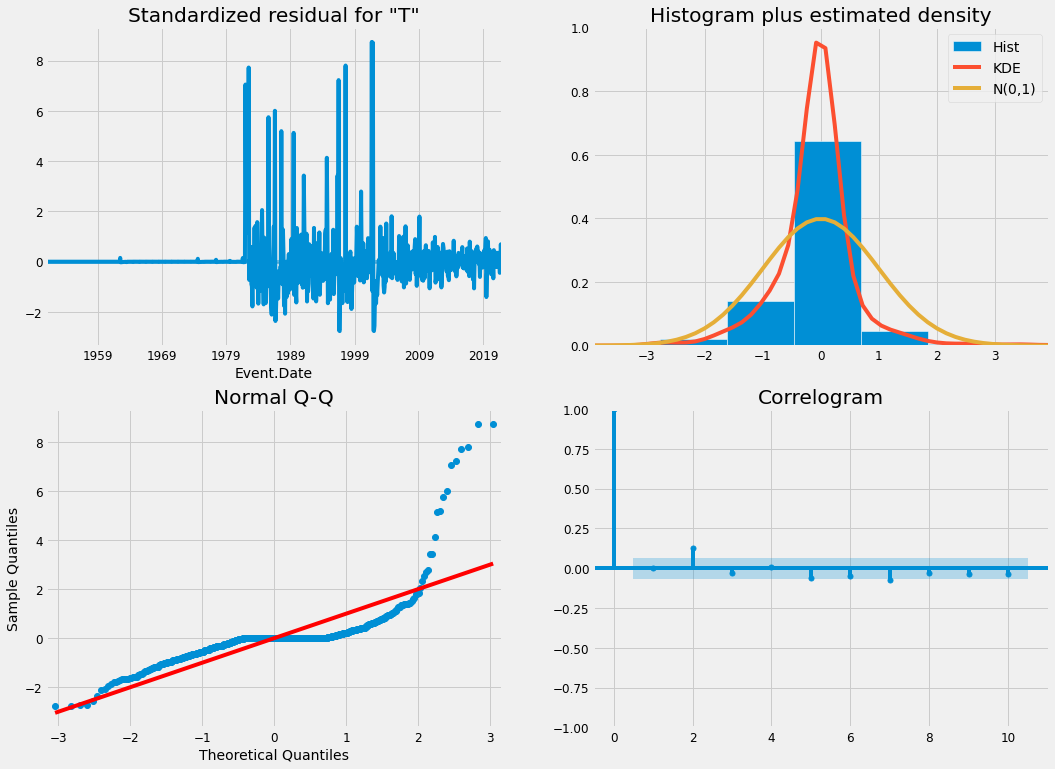

In [11]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

# Validating forecasts

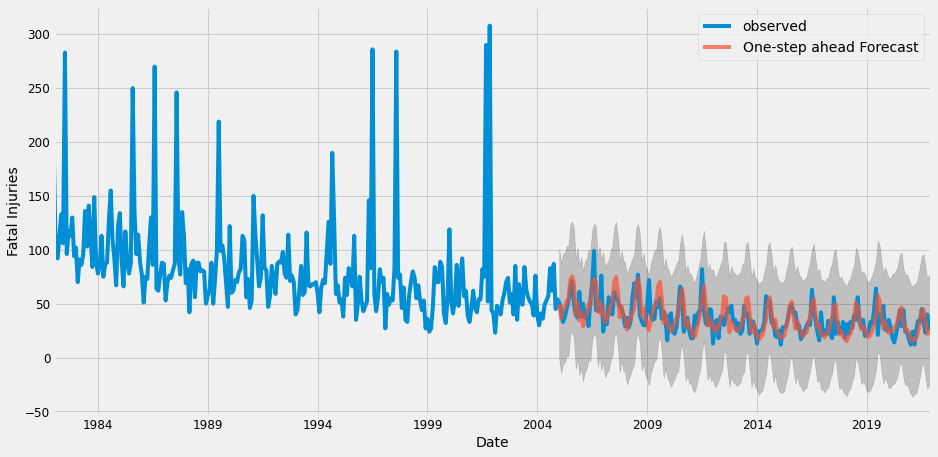

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2005-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['1982':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Fatal Injuries')
plt.legend()
plt.show()

In [13]:
y_forecasted = pred.predicted_mean
y_truth = y['2021-12-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 28.74
The Root Mean Squared Error of our forecasts is 5.36


# Producing and Visualizing Forecasts

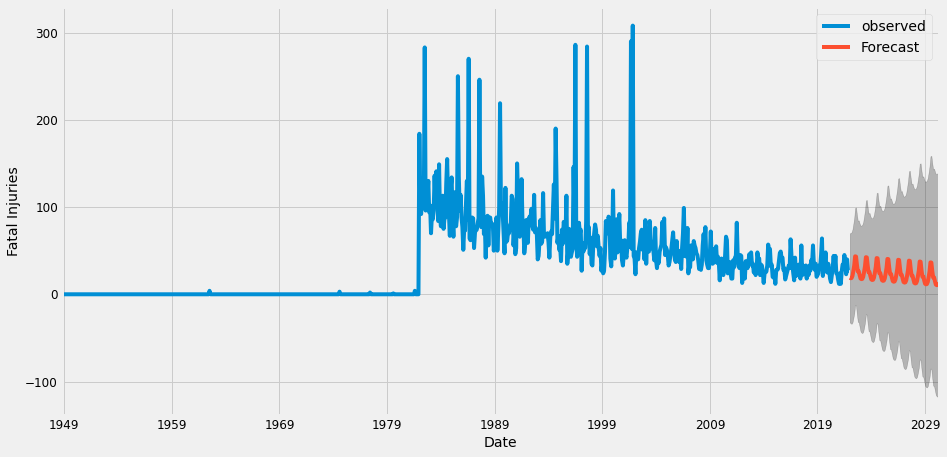

In [16]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Fatal Injuries')
plt.legend()
plt.show()